# Data conversion, XGB and RANDOM FOREST!

In [223]:
# Gewoon alle code runnen, dan krijg je een file met alle predictions, je moet zorgen dat je de zorg21  en zorg 22  datasets hebt, en alle kwb files van 2018-2022
import pandas as pd
import xgboost as xgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

def append_str_to_columns(df, str):
    new_columns = []
    for column in df.columns:
        if column != "gwb_code_10":
            new_columns.append(column + '{}'.format(str))
        else:
            new_columns.append(column)
    df.columns = new_columns
    return df

# adding data about youth care to 2021 and 2022 datasets, because they did not exist before

zorg21 = pd.read_csv('./data/zorg21.csv')
zorg21 = zorg21[zorg21['VormenVanJeugdzorg'] == 'T001203']
zorg21 = zorg21[zorg21['Wijken'].str[:2] != 'BU']
zorg21 = zorg21[['Wijken', 'p_jz_tn']]
kwb_2021 = pd.read_excel('./data/kwb-2021.xls')
kwb_2021 = kwb_2021.applymap(lambda x: x.strip() if isinstance(x, str) else x)
kwb_2021 = kwb_2021[kwb_2021['gwb_code_10'].str[:2] != 'BU']
kwb_2021 = kwb_2021[[x for x in kwb_2021.columns if "p_jz_tn" not in x ]]
kwb_2021= kwb_2021.merge(zorg21, left_on='gwb_code_10', right_on='Wijken', how='left')

zorg22 = pd.read_csv('./data/zorg22.csv')
zorg22 = zorg22[zorg22['VormenVanJeugdzorg'] == 'T001203']
zorg22 = zorg22[zorg22['Wijken'].str[:2] != 'BU']
zorg22 = zorg22[['Wijken', 'p_jz_tn']]
kwb_2022 = pd.read_excel('./data/kwb-2022.xls')
kwb_2022 = kwb_2022.applymap(lambda x: x.strip() if isinstance(x, str) else x)
kwb_2022 = kwb_2022[kwb_2022['gwb_code_10'].str[:2] != 'BU']
kwb_2022 = kwb_2022[[x for x in kwb_2022.columns if "p_jz_tn" not in x ]]
kwb_2022= kwb_2022.merge(zorg22, left_on='gwb_code_10', right_on='Wijken', how='left')

In [224]:
dflist = ["./data/kwb-2018.xls", "./data/kwb-2019.xlsx","./data/kwb-2020.xls", kwb_2021, kwb_2022]
columnlist = ["gwb_code_10", "p_00_14",	"p_15_24",	"p_25_44",	"p_45_64",	"p_65_oo",	"p_ongeh",	"p_gehuwd",	"p_gesch",	"p_verwed",	"p_marok", "p_jz_tn", "p_antaru",	"p_suri","p_tur", "p_hh_z_k",	"p_hh_m_k", "bev_dich", "p_koopw",	"p_huurw", "g_ink_po",	"g_ink_pi",	"p_ink_li",	"p_ink_hi",	"p_n_act",	"p_hh_li",	"p_hh_hi",	"p_hh_lkk",	"p_hh_osm",	"a_soz_wb",	"a_soz_ao",	"a_soz_ww",	"a_soz_ow"]
stringlist = ["_2018", "_2019", "_2020", "_2021", "_2022"]

# getting all data and combining into dfs, also performing stripping, and turning useless values into nan

dfs = pd.DataFrame
for i in range(len(dflist)):
    if i == 0:
        print(dflist[i])
        df = pd.read_excel(dflist[i])
        df = df[df['gwb_code_10'].str[:2] != 'BU']
        df = df[df['gwb_code_10'].str[:2] != 'GM']
        df = df[df['gwb_code_10'].str[:2] != 'NL']
        df = df[[x for x in df.columns if x in columnlist]]
        df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
        df = df.replace([np.inf, -np.inf, np.nan, ".", "-"], np.nan)
        # comma to dot because the dutch system is stupid!
        df = df.applymap(lambda x: str(x.replace(',','.')) if isinstance(x, str) else x)
        df = df.apply(pd.to_numeric, errors='ignore')
        df = df.fillna(df.mean())
        df = append_str_to_columns(df, stringlist[i])
        dfs = df
    elif 0 < i < 3:
        print(dflist[i])
        df = pd.read_excel(dflist[i])
        df = df[df['gwb_code_10'].str[:2] != 'BU']
        df = df[df['gwb_code_10'].str[:2] != 'GM']
        df = df[df['gwb_code_10'].str[:2] != 'NL']
        df = df[[x for x in df.columns if x in columnlist]]
        df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
        df = df.replace([np.inf, -np.inf, np.nan, ".", "-"], np.nan)
        df = df.applymap(lambda x: str(x.replace(',','.')) if isinstance(x, str) else x)
        df = append_str_to_columns(df, stringlist[i])
        dfs = pd.merge(dfs, df, on='gwb_code_10', how='outer')
    else:
        df = dflist[i]
        df = df[df['gwb_code_10'].str[:2] != 'BU']
        df = df[df['gwb_code_10'].str[:2] != 'GM']
        df = df[df['gwb_code_10'].str[:2] != 'NL']
        df = df[[x for x in df.columns if x in columnlist]]
        df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
        df = df.replace([np.inf, -np.inf, np.nan, ".", "-"], np.nan)
        df = df.applymap(lambda x: str(x.replace(',','.')) if isinstance(x, str) else x)
        df = append_str_to_columns(df, stringlist[i])
        dfs = pd.merge(dfs, df, on='gwb_code_10', how='outer')

./data/kwb-2018.xls


C:\Users\stanf\AppData\Local\Temp/ipykernel_5652/3222761454.py:18: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


./data/kwb-2019.xlsx
./data/kwb-2020.xls


In [225]:
from IPython.display import display
# handling missing data, and sorting columns for forward fill

cols = sorted(dfs.columns)
cols.remove("gwb_code_10")
cols = ["gwb_code_10"] + cols
dfs = dfs[cols]

for x in dfs.columns:
    if "2018" in x:
        dfs[x] = dfs[x].fillna(dfs[x].mean())

dfs = dfs.ffill(axis='columns')
dfs = dfs.apply(pd.to_numeric, errors='ignore')

display(dfs)

,gwb_code_10,a_soz_ao_2018,a_soz_ao_2019,a_soz_ao_2020,a_soz_ao_2021,a_soz_ao_2022,a_soz_ow_2018,a_soz_ow_2019,a_soz_ow_2020,a_soz_ow_2021,...,p_jz_tn_2018,p_jz_tn_2019,p_jz_tn_2020,p_jz_tn_2021,p_jz_tn_2022,p_koopw_2018,p_koopw_2019,p_koopw_2020,p_koopw_2021,p_koopw_2022
0,WK000300,710.000000,730.000000,710.000000,710.000000,710.000000,2670.000000,2670.000000,2750.000000,2750.000000,...,9.900000,11.500000,10.200000,10.200000,10.200000,49.000000,48.000000,48.000000,48.000000,48.0
1,WK000500,580.000000,580.000000,580.000000,580.000000,580.000000,2080.000000,2080.000000,2080.000000,2080.000000,...,9.900000,9.900000,9.900000,9.900000,9.900000,69.000000,69.000000,69.000000,69.000000,69.0
2,WK000900,150.000000,150.000000,150.000000,150.000000,150.000000,1170.000000,1170.000000,1170.000000,1170.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,76.000000,76.000000,76.000000,76.000000,76.0
3,WK000901,50.000000,50.000000,50.000000,50.000000,50.000000,190.000000,190.000000,190.000000,190.000000,...,9.600000,9.600000,9.600000,9.600000,9.600000,78.000000,78.000000,78.000000,78.000000,78.0
4,WK001000,870.000000,870.000000,870.000000,870.000000,870.000000,4230.000000,4230.000000,4230.000000,4230.000000,...,10.600000,10.600000,10.600000,10.600000,10.600000,55.000000,55.000000,55.000000,55.000000,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3705,WK199102,244.602329,244.602329,244.602329,244.602329,244.602329,1011.044925,1011.044925,1011.044925,1011.044925,...,8.408712,8.408712,8.408712,8.408712,17.272727,66.486352,66.486352,66.486352,66.486352,73.0
3706,WK199103,244.602329,244.602329,244.602329,244.602329,244.602329,1011.044925,1011.044925,1011.044925,1011.044925,...,8.408712,8.408712,8.408712,8.408712,12.000000,66.486352,66.486352,66.486352,66.486352,76.0
3707,WK199104,244.602329,244.602329,244.602329,244.602329,244.602329,1011.044925,1011.044925,1011.044925,1011.044925,...,8.408712,8.408712,8.408712,8.408712,16.739130,66.486352,66.486352,66.486352,66.486352,74.0
3708,WK199105,244.602329,244.602329,244.602329,244.602329,244.602329,1011.044925,1011.044925,1011.044925,1011.044925,...,8.408712,8.408712,8.408712,8.408712,11.000000,66.486352,66.486352,66.486352,66.486352,74.0


In [226]:
# percentages to log
dfs[[x for x in dfs.columns if "p_" in x]] = np.log2(dfs[[x for x in dfs.columns if "p_" in x]].div(100))
dfs = dfs.replace([np.inf, -np.inf, np.nan, ".", "-"], np.nan)
dfs[[x for x in dfs.columns if "p_" in x]] = dfs[[x for x in dfs.columns if "p_" in x]].fillna(0)
display(dfs)

,gwb_code_10,a_soz_ao_2018,a_soz_ao_2019,a_soz_ao_2020,a_soz_ao_2021,a_soz_ao_2022,a_soz_ow_2018,a_soz_ow_2019,a_soz_ow_2020,a_soz_ow_2021,...,p_jz_tn_2018,p_jz_tn_2019,p_jz_tn_2020,p_jz_tn_2021,p_jz_tn_2022,p_koopw_2018,p_koopw_2019,p_koopw_2020,p_koopw_2021,p_koopw_2022
0,WK000300,710.000000,730.000000,710.000000,710.000000,710.000000,2670.000000,2670.000000,2750.000000,2750.000000,...,-3.336428,-3.120294,-3.293359,-3.293359,-3.293359,-1.029146,-1.058894,-1.058894,-1.058894,-1.058894
1,WK000500,580.000000,580.000000,580.000000,580.000000,580.000000,2080.000000,2080.000000,2080.000000,2080.000000,...,-3.336428,-3.336428,-3.336428,-3.336428,-3.336428,-0.535332,-0.535332,-0.535332,-0.535332,-0.535332
2,WK000900,150.000000,150.000000,150.000000,150.000000,150.000000,1170.000000,1170.000000,1170.000000,1170.000000,...,-3.473931,-3.473931,-3.473931,-3.473931,-3.473931,-0.395929,-0.395929,-0.395929,-0.395929,-0.395929
3,WK000901,50.000000,50.000000,50.000000,50.000000,50.000000,190.000000,190.000000,190.000000,190.000000,...,-3.380822,-3.380822,-3.380822,-3.380822,-3.380822,-0.358454,-0.358454,-0.358454,-0.358454,-0.358454
4,WK001000,870.000000,870.000000,870.000000,870.000000,870.000000,4230.000000,4230.000000,4230.000000,4230.000000,...,-3.237864,-3.237864,-3.237864,-3.237864,-3.237864,-0.862496,-0.862496,-0.862496,-0.862496,-0.862496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3705,WK199102,244.602329,244.602329,244.602329,244.602329,244.602329,1011.044925,1011.044925,1011.044925,1011.044925,...,-3.571971,-3.571971,-3.571971,-3.571971,-2.533432,-0.588870,-0.588870,-0.588870,-0.588870,-0.454032
3706,WK199103,244.602329,244.602329,244.602329,244.602329,244.602329,1011.044925,1011.044925,1011.044925,1011.044925,...,-3.571971,-3.571971,-3.571971,-3.571971,-3.058894,-0.588870,-0.588870,-0.588870,-0.588870,-0.395929
3707,WK199104,244.602329,244.602329,244.602329,244.602329,244.602329,1011.044925,1011.044925,1011.044925,1011.044925,...,-3.571971,-3.571971,-3.571971,-3.571971,-2.578704,-0.588870,-0.588870,-0.588870,-0.588870,-0.434403
3708,WK199105,244.602329,244.602329,244.602329,244.602329,244.602329,1011.044925,1011.044925,1011.044925,1011.044925,...,-3.571971,-3.571971,-3.571971,-3.571971,-3.184425,-0.588870,-0.588870,-0.588870,-0.588870,-0.434403


In [231]:
# Extract features and target variable
target = dfs['p_jz_tn_2022']
features = dfs[[x for x in dfs.columns if "2022" not in x]]
features = features[[x for x in features.columns if "gwb_code_10" not in x]]
pred_set = dfs[[x for x in dfs.columns if "2018" not in x]]
pred_set = pred_set[[x for x in pred_set.columns if "gwb_code_10" not in x]]
pred_set.columns = features.columns

In [232]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train XGBoost model
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = xgb_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 0.07474003921394574
R^2 Score: 0.6973223258481437


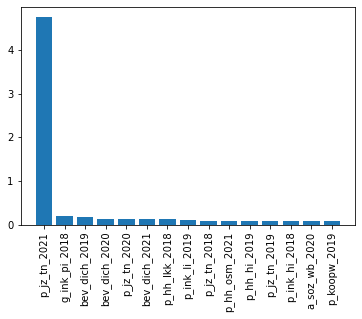

In [233]:
import matplotlib.pyplot as plt
feature_importance = sorted(xgb_model.get_booster().get_score(importance_type="gain").items(), key=lambda x:x[1], reverse=True)

features_imp = list(zip(*feature_importance))[0]
importances = list(zip(*feature_importance))[1]

plt.bar(range(len(feature_importance[:15])), importances[:15], tick_label=features_imp[:15])
plt.xticks(rotation = 90)
plt.show()

In [242]:
prediction_xgb = xgb_model.predict(pred_set)
dfs["prediction_xgb"] = prediction_xgb

In [235]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the regressor
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Calculate the root mean squared error (RMSE) of the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 0.264206862791088


In [239]:
prediction_rf = rf_regressor.predict(pred_set)
dfs["prediction_rf"] = prediction_rf

In [ ]:
# currently not in use, can be used for time series prediction

# ts_2018 = dfs[[x for x in dfs.columns if "2018" in x]]
# ts_2018.columns = pd.Index(map(lambda x : str(x)[:-5], ts_2018.columns))
# ts_2018.loc[:, 'year'] = pd.to_datetime('2018')
# ts_2019 = dfs[[x for x in dfs.columns if "2019" in x]]
# ts_2019.columns = pd.Index(map(lambda x : str(x)[:-5], ts_2019.columns))
# ts_2019.loc[:, 'year'] = pd.to_datetime('2019')
# ts_2020 = dfs[[x for x in dfs.columns if "2020" in x]]
# ts_2020.columns = pd.Index(map(lambda x : str(x)[:-5], ts_2020.columns))
# ts_2020.loc[:, 'year'] = pd.to_datetime('2020')
# ts_2021 = dfs[[x for x in dfs.columns if "2021" in x]]
# ts_2021.columns = pd.Index(map(lambda x : str(x)[:-5], ts_2021.columns))
# ts_2021.loc[:, 'year'] = pd.to_datetime('2021')
# ts_2022 = dfs[[x for x in dfs.columns if "2022" in x]]
# ts_2022.columns = pd.Index(map(lambda x : str(x)[:-5], ts_2022.columns))
# ts_2022.loc[:, 'year'] = pd.to_datetime('2022')
# ts_total = pd.concat([ts_2018, ts_2019, ts_2020, ts_2021, ts_2022])

C:\Users\stanf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [244]:
display(dfs)
dfs.to_csv("data_predictions.csv")

,gwb_code_10,a_soz_ao_2018,a_soz_ao_2019,a_soz_ao_2020,a_soz_ao_2021,a_soz_ao_2022,a_soz_ow_2018,a_soz_ow_2019,a_soz_ow_2020,a_soz_ow_2021,...,p_jz_tn_2020,p_jz_tn_2021,p_jz_tn_2022,p_koopw_2018,p_koopw_2019,p_koopw_2020,p_koopw_2021,p_koopw_2022,prediction_rf,prediction_xgb
0,WK000300,710.000000,730.000000,710.000000,710.000000,710.000000,2670.000000,2670.000000,2750.000000,2750.000000,...,-3.293359,-3.293359,-3.293359,-1.029146,-1.058894,-1.058894,-1.058894,-1.058894,-3.281651,-3.122224
1,WK000500,580.000000,580.000000,580.000000,580.000000,580.000000,2080.000000,2080.000000,2080.000000,2080.000000,...,-3.336428,-3.336428,-3.336428,-0.535332,-0.535332,-0.535332,-0.535332,-0.535332,-3.340716,-3.320928
2,WK000900,150.000000,150.000000,150.000000,150.000000,150.000000,1170.000000,1170.000000,1170.000000,1170.000000,...,-3.473931,-3.473931,-3.473931,-0.395929,-0.395929,-0.395929,-0.395929,-0.395929,-3.467850,-3.482716
3,WK000901,50.000000,50.000000,50.000000,50.000000,50.000000,190.000000,190.000000,190.000000,190.000000,...,-3.380822,-3.380822,-3.380822,-0.358454,-0.358454,-0.358454,-0.358454,-0.358454,-3.372595,-3.368351
4,WK001000,870.000000,870.000000,870.000000,870.000000,870.000000,4230.000000,4230.000000,4230.000000,4230.000000,...,-3.237864,-3.237864,-3.237864,-0.862496,-0.862496,-0.862496,-0.862496,-0.862496,-3.254779,-3.247366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3705,WK199102,244.602329,244.602329,244.602329,244.602329,244.602329,1011.044925,1011.044925,1011.044925,1011.044925,...,-3.571971,-3.571971,-2.533432,-0.588870,-0.588870,-0.588870,-0.588870,-0.454032,-2.639659,-2.636184
3706,WK199103,244.602329,244.602329,244.602329,244.602329,244.602329,1011.044925,1011.044925,1011.044925,1011.044925,...,-3.571971,-3.571971,-3.058894,-0.588870,-0.588870,-0.588870,-0.588870,-0.395929,-3.037504,-3.018377
3707,WK199104,244.602329,244.602329,244.602329,244.602329,244.602329,1011.044925,1011.044925,1011.044925,1011.044925,...,-3.571971,-3.571971,-2.578704,-0.588870,-0.588870,-0.588870,-0.588870,-0.434403,-2.703510,-2.733212
3708,WK199105,244.602329,244.602329,244.602329,244.602329,244.602329,1011.044925,1011.044925,1011.044925,1011.044925,...,-3.571971,-3.571971,-3.184425,-0.588870,-0.588870,-0.588870,-0.588870,-0.434403,-3.147533,-3.152646
